In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
subreddits = pd.read_csv('../data/subreddits.csv')
submissions = pd.read_csv('../data/submissions.csv')
comments = pd.read_csv('../data/comments.csv')

# Subreddits

In [4]:
subreddits.head()

,label,Link,reported_Subscribers,table_number,display_name,https_Link,MESSAGE_PREFIX,STR_FIELD,VALID_TIME_FILTERS,__class__,...,user_is_subscriber,user_sr_flair_enabled,user_sr_theme_enabled,whitelist_status,widgets,wiki,wiki_enabled,wls,videostream_links_count,content_category
0,League of Legends,/r/leagueoflegends,699793,0,leagueoflegends,https://reddit.com/r/leagueoflegends,#,display_name,"{'day', 'all', 'year', 'hour', 'week', 'month'}",<class 'praw.models.reddit.subreddit.Subreddit'>,...,NaN,NaN,1.0,all_ads,SubredditWidgets(subreddit=Subreddit(display_n...,<praw.models.reddit.subreddit.SubredditWiki ob...,1.0,6.0,NaN,NaN
1,Pokémon,/r/pokemon,444468,0,pokemon,https://reddit.com/r/pokemon,#,display_name,"{'day', 'all', 'year', 'hour', 'week', 'month'}",<class 'praw.models.reddit.subreddit.Subreddit'>,...,NaN,NaN,1.0,all_ads,SubredditWidgets(subreddit=Subreddit(display_n...,<praw.models.reddit.subreddit.SubredditWiki ob...,1.0,6.0,3.0,NaN
2,Minecraft,/r/Minecraft,440180,0,Minecraft,https://reddit.com/r/Minecraft,#,display_name,"{'day', 'all', 'year', 'hour', 'week', 'month'}",<class 'praw.models.reddit.subreddit.Subreddit'>,...,NaN,NaN,1.0,all_ads,SubredditWidgets(subreddit=Subreddit(display_n...,<praw.models.reddit.subreddit.SubredditWiki ob...,1.0,6.0,100.0,NaN
3,The Elder Scrolls V: Skyrim,/r/skyrim,298865,0,skyrim,https://reddit.com/r/skyrim,#,display_name,"{'day', 'all', 'year', 'hour', 'week', 'month'}",<class 'praw.models.reddit.subreddit.Subreddit'>,...,NaN,NaN,1.0,all_ads,SubredditWidgets(subreddit=Subreddit(display_n...,<praw.models.reddit.subreddit.SubredditWiki ob...,1.0,6.0,13.0,NaN
4,Hearthstone: Heroes of Warcraft,/r/hearthstone,253622,0,hearthstone,https://reddit.com/r/hearthstone,#,display_name,"{'day', 'all', 'year', 'hour', 'week', 'month'}",<class 'praw.models.reddit.subreddit.Subreddit'>,...,NaN,NaN,1.0,all_ads,SubredditWidgets(subreddit=Subreddit(display_n...,<praw.models.reddit.subreddit.SubredditWiki ob...,1.0,6.0,7.0,NaN


In [5]:
subreddits['type'] = subreddits['table_number'].map({
    0:'Games and series',
    1:'Tabletop',
    2:'Nonspecific',
    3:'Genres',
    4:'Groups',
    5:'Platforms',
    6:'Companies',
})

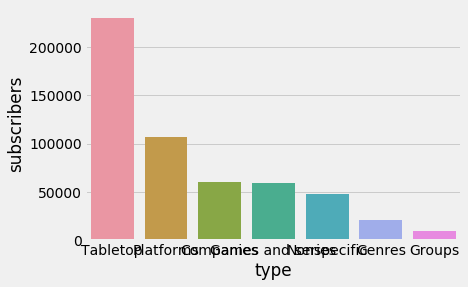

In [6]:
df = (subreddits.groupby('type', as_index=False)
      .agg({'subscribers':'mean'})
      .sort_values('subscribers', ascending=False))
sns.barplot(data=df, x='type',y='subscribers')

In [7]:
subreddits['subscribers_thousands'] = subreddits['subscribers'] / 1000.0


# Submissions

In [8]:
submissions.head()

,author_fullname,author_id,author_name,clicked,domain,downvotes,edited,fullname,gilded,id,...,media_only,mod_note,name,num_comments,score,selftext,subreddit,subreddit_id,title,upvotes
0,t2_9i3eg,9i3eg,SimplifyEUW,0.0,self.leagueoflegends,0.0,1.491081e+09,t3_62phzt,0.0,62phzt,...,0.0,NaN,t3_62phzt,873.0,68963.0,Lets do this /r/leagueoflegends!!!\r\n\r\nEDIT...,leagueoflegends,t5_2rfxx,OUR LORD AND SAVIOUR MARC MERRILL HAS SAID IF ...,68963.0
1,t2_juubx,juubx,CarterIsBad,0.0,self.leagueoflegends,0.0,1.515095e+09,t3_7o5bj9,1.0,7o5bj9,...,0.0,NaN,t3_7o5bj9,4880.0,53882.0,[Unbanned](https://twitter.com/lol_tyler1/stat...,leagueoflegends,t5_2rfxx,Tyler1 unbanned from League of Legends,53882.0
2,t2_8bqod,8bqod,KILLERCRACK,0.0,i.redd.it,0.0,0.000000e+00,t3_88rypt,0.0,88rypt,...,0.0,NaN,t3_88rypt,312.0,50985.0,NaN,leagueoflegends,t5_2rfxx,Jesus Christ. If this gets enough upvotes it w...,50985.0
3,t2_8cqiq,8cqiq,MontageRyanxD,0.0,twitlonger.com,0.0,0.000000e+00,t3_88vzaw,2.0,88vzaw,...,0.0,NaN,t3_88vzaw,3934.0,50028.0,NaN,leagueoflegends,t5_2rfxx,DoubleLift's Statement on his Family,50028.0
4,t2_o06ux,o06ux,Pyrals,0.0,self.leagueoflegends,0.0,1.527206e+09,t3_8lxchp,2.0,8lxchp,...,0.0,NaN,t3_8lxchp,1019.0,49019.0,Totalbiscuit has passed away as of today on Ma...,leagueoflegends,t5_2rfxx,"Totalbiscuit has passed away, let us never for...",49019.0


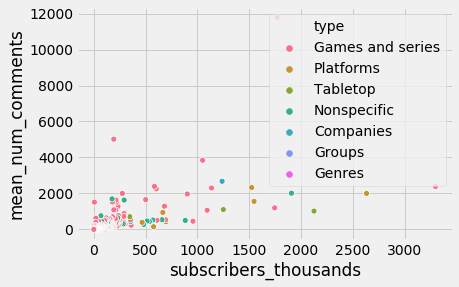

In [9]:
df = (submissions.groupby('subreddit', as_index=False)
 .agg({"score":"mean", 'num_comments':'mean'})
 .rename(columns={'score':'mean_score', 'num_comments':'mean_num_comments'})
 .merge(subreddits, left_on='subreddit', right_on='display_name')
 #.drop(columns=['Link','https_Link','title','label','table_number','display_name'])
 .sort_values('subscribers', ascending=False))
df['subscribers_thousands'] = df['subscribers'] / 1000.00

sns.scatterplot(data=df, x='subscribers_thousands', y='mean_num_comments', hue='type')
#sns.despine(left=True)
plt.show()

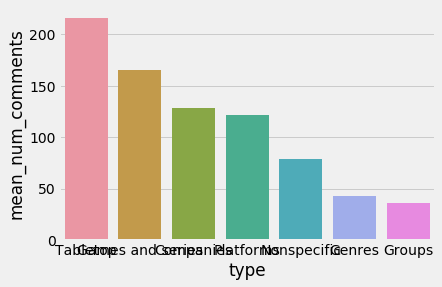

In [10]:
df = (df.groupby('type', as_index=False)
      .agg({'mean_score':'mean', 'mean_num_comments':'mean', 'subscribers_thousands':'mean'}))

sns.barplot(data=df.sort_values('mean_num_comments', ascending=False),
            x='type', y='mean_num_comments')

## Language analysis

In [11]:
# Subreddit-specific Self-Text Corpus
df = (submissions
      .dropna(subset=['selftext'])
      .groupby('subreddit', as_index=False)
      .agg({'selftext':'sum'}))
df['corpus_len'] = df.selftext.apply(len)
df.sort_values('corpus_len', ascending=False, inplace=True)
subreddit_top10_corpus = df
subreddit_top10_corpus.head()

,subreddit,selftext,corpus_len
99,FutureFight,I keep seeing posts where people ask who to sp...,85884
46,ClearBackblast,You few do far more than most people realize t...,68684
90,FanTheories,The title quote comes from Thanos speaking to ...,66728
309,aion,**Hey everyone! Welcome to my Ping Reducing Gu...,54084
519,ps3deals,"So, I missed a few sales and just thought I'd ...",50324


Text(0.5, 1.0, "Corpus Length of Subreddits' Top 10 submissions")

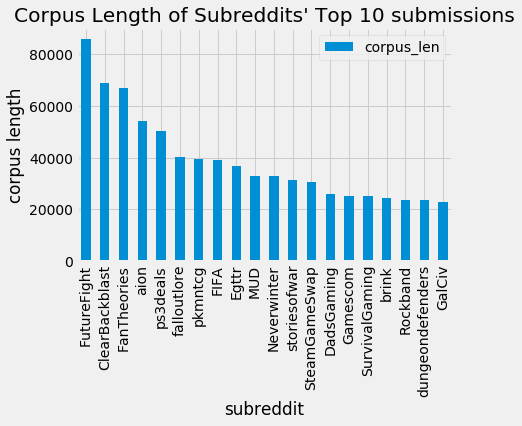

In [12]:
ax = subreddit_top10_corpus.set_index('subreddit').head(20).plot.bar()
ax.set_ylabel('corpus length')
ax.set_title('Corpus Length of Subreddits\' Top 10 submissions')

In [13]:
subreddit_top10_corpus['tokens'] = subreddit_top10_corpus['selftext'].apply(nltk.word_tokenize)
subreddit_top10_corpus[['subreddit','tokens']].head()

,subreddit,tokens
99,FutureFight,"[I, keep, seeing, posts, where, people, ask, w..."
46,ClearBackblast,"[You, few, do, far, more, than, most, people, ..."
90,FanTheories,"[The, title, quote, comes, from, Thanos, speak..."
309,aion,"[**Hey, everyone, !, Welcome, to, my, Ping, Re..."
519,ps3deals,"[So, ,, I, missed, a, few, sales, and, just, t..."


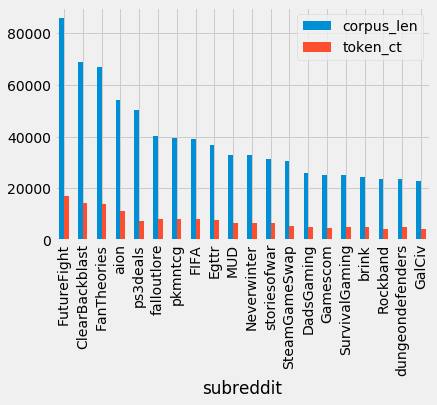

In [14]:
subreddit_top10_corpus['token_ct'] = subreddit_top10_corpus['tokens'].apply(len)
ax = (subreddit_top10_corpus.sort_values('corpus_len', ascending=False).head(20).set_index('subreddit')).plot.bar()
plt.show()

## Comments

In [17]:
comments = pd.read_csv('../data/comments.csv')

print(comments.columns)

In [18]:
stop_words = set(stopwords.words('english'))

In [22]:
comments['body_tokens'] = comments['body'].apply(nltk.word_tokenize)

comments['body_tokens_filtered'] = comments['body_tokens'].apply(lambda tokens: [t for t in tokens if not t.lower() in stop_words])

comments['body_tokens_lower'] = comments['body_tokens'].apply(lambda tokens: [t.lower() for t in tokens])

comments['body_tokens_lower_filtered'] = comments['body_tokens_lower'].apply(lambda tokens: [t for t in tokens if not t in stop_words])

Issues:

1. punctuation!
2. cAsE
3. links
4. ***markdown syntax tokens***
5. emoji 😩
6. `stopwords` includes "not" but doesn't include "n't" - what the hek

Entire comment corpus:

In [24]:
corpus = comments['body_tokens_filtered'].sum()

Total corpus size:

In [30]:
len(corpus)

5444

Outside corpus of comments from larger reddit:

In [34]:
outside_corpus = pd.read_csv('../data/out-of-corpus-comments.csv')['body'].sum()

outside_corpus_tokens = nltk.word_tokenize(outside_corpus)

outside_corpus_tokens_filtered = [t for t in outside_corpus_tokens if not t.lower() in stop_words]

outside_corpus_tokens_lower = [t.lower() for t in outside_corpus_tokens]

outside_corpus_tokens_lower_filtered = [t for t in outside_corpus_tokens_lower if not t.lower() in stop_words]